In [3]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

import importlib
import normalized_count
import helpers
importlib.reload(normalized_count)
importlib.reload(helpers)

<module 'helpers' from '/home/delta/devel/firefly-networks/helpers.py'>

In [4]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 500

In [5]:
data_dir = "data"
dw = normalized_count.DataWrangler(data_dir, do_3d=True)

In [6]:
max(dw.dfs[0]["t"])

106755

<AxesSubplot:>

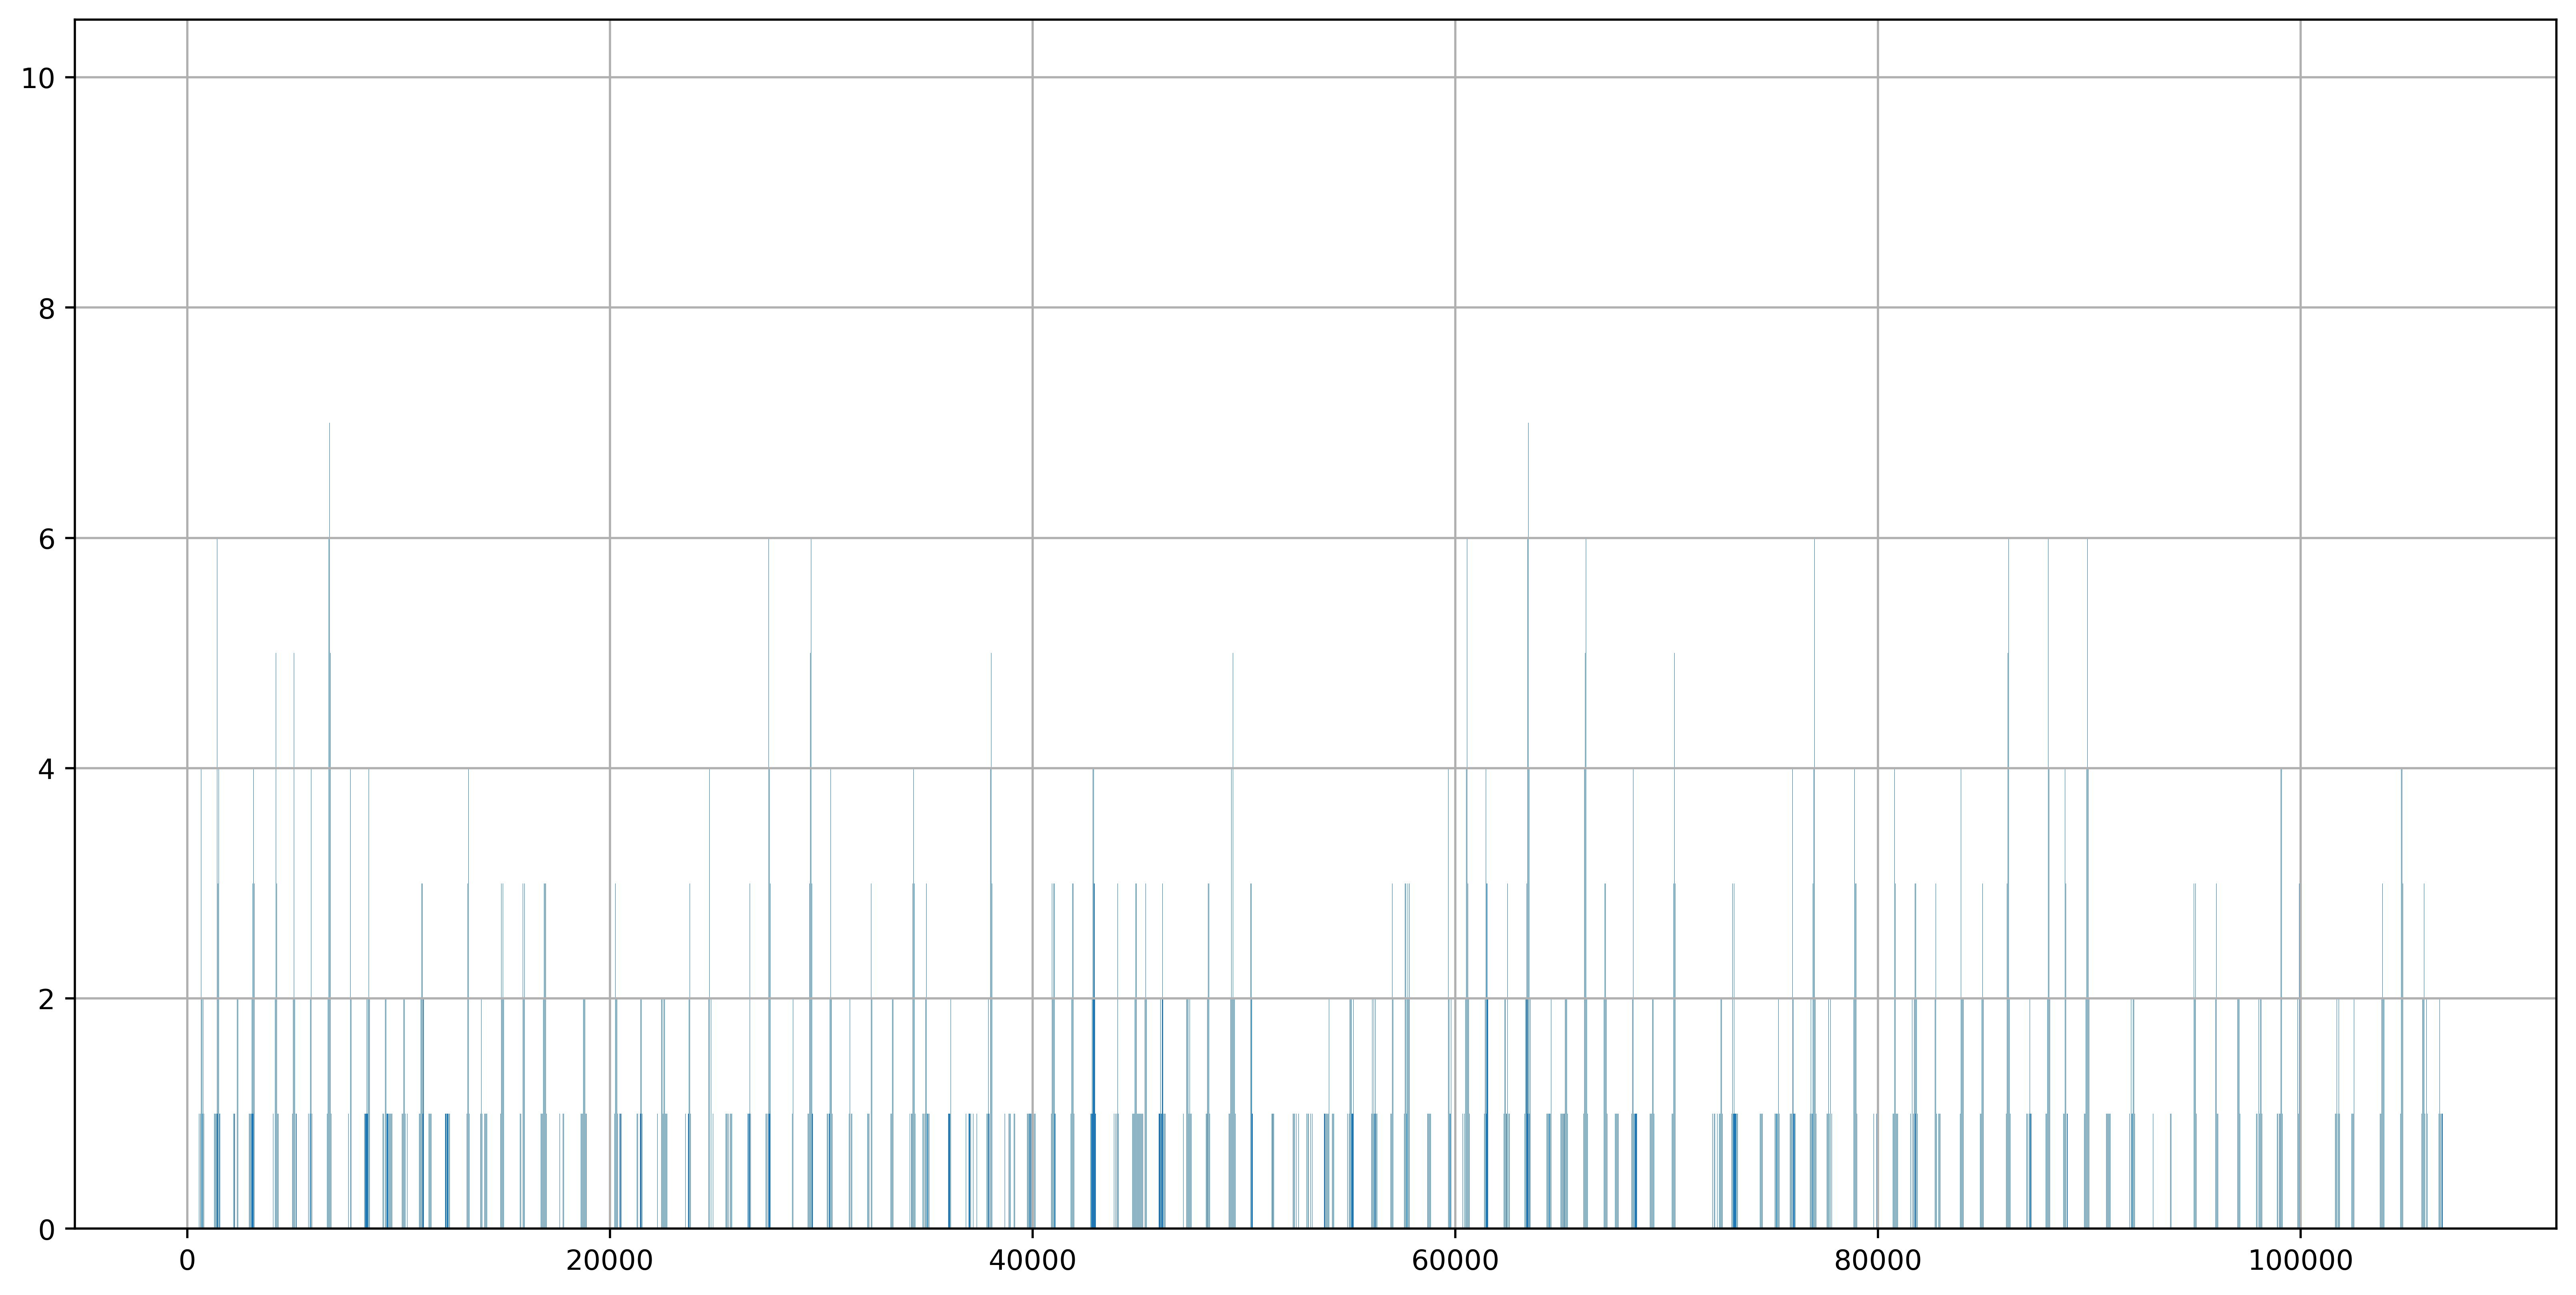

In [7]:
fig, ax = plt.subplots(figsize=(16, 8))
fig.patch.set_facecolor("white")
dw.dfs[0]["t"].hist(ax=ax, bins=max(dw.dfs[0]["t"]))

In [8]:
def get_cascade_bounds(ts, num_empty_threshold=2):
    ts_sorted = sorted(ts)
    
    bounds = []
    bounds.append(ts_sorted[0])
    
    last_t = ts_sorted[0]
    for i in range(1, len(ts_sorted)):
        current_t = ts_sorted[i]
        
        if current_t - last_t > num_empty_threshold:
            bounds.append(last_t + 1)
            
        last_t = current_t
        
    bounds.append(last_t + 1)
        
    return bounds

In [9]:
def make_cascades_df(bounds):
    cascades = []
    
    cascade_no = 1
    
    for i in range(1, len(bounds)):
        cascade_start = bounds[i - 1]
        cascade_end = bounds[i]
        cascades.append((cascade_no, cascade_start, cascade_end))
        cascade_no += 1
        
    cascades_df = pd.DataFrame(cascades, columns=["cascade_no", "cascade_start", "cascade_end"])
    
    return cascades_df

In [10]:
def extend_df_with_cascade_no(xyzt_df, num_empty_threshold=2):
    bounds = get_cascade_bounds(xyzt_df["t"], num_empty_threshold=num_empty_threshold)
    cascades_df = make_cascades_df(bounds)
    print(cascades_df)
    
    def get_cascade_no_for_t(t):
        filtered_df = cascades_df.loc[(t >= cascades_df["cascade_start"]) &
                                      (t < cascades_df["cascade_end"])]
        no = filtered_df["cascade_no"]
        
        if len(no) != 1:
            print(t)
            print(no)
            raise Exception("ahhh")
            
        return list(no)[0]
    
    xyzt_df["cascade_no"] = xyzt_df["t"].apply(lambda t: get_cascade_no_for_t(t))
    
    return

extend_df_with_cascade_no(dw.dfs[0], num_empty_threshold=30)
extend_df_with_cascade_no(dw.dfs[1], num_empty_threshold=30)

     cascade_no  cascade_start  cascade_end
0             1             19          137
1             2            137          793
2             3            793         1556
3             4           1556         2408
4             5           2408         3245
..          ...            ...          ...
216         217         103944       104614
217         218         104614       104863
218         219         104863       105949
219         220         105949       105986
220         221         105986       106756

[221 rows x 3 columns]
    cascade_no  cascade_start  cascade_end
0            1              0          113
1            2            113          238
2            3            238          462
3            4            462          559
4            5            559          831
5            6            831         1226
6            7           1226         1563
7            8           1563         1928
8            9           1928         2318
9           10    

<AxesSubplot:title={'center':'Flashes per cascade, df #0'}, xlabel='cascade_no', ylabel='number of flashes in cascade'>

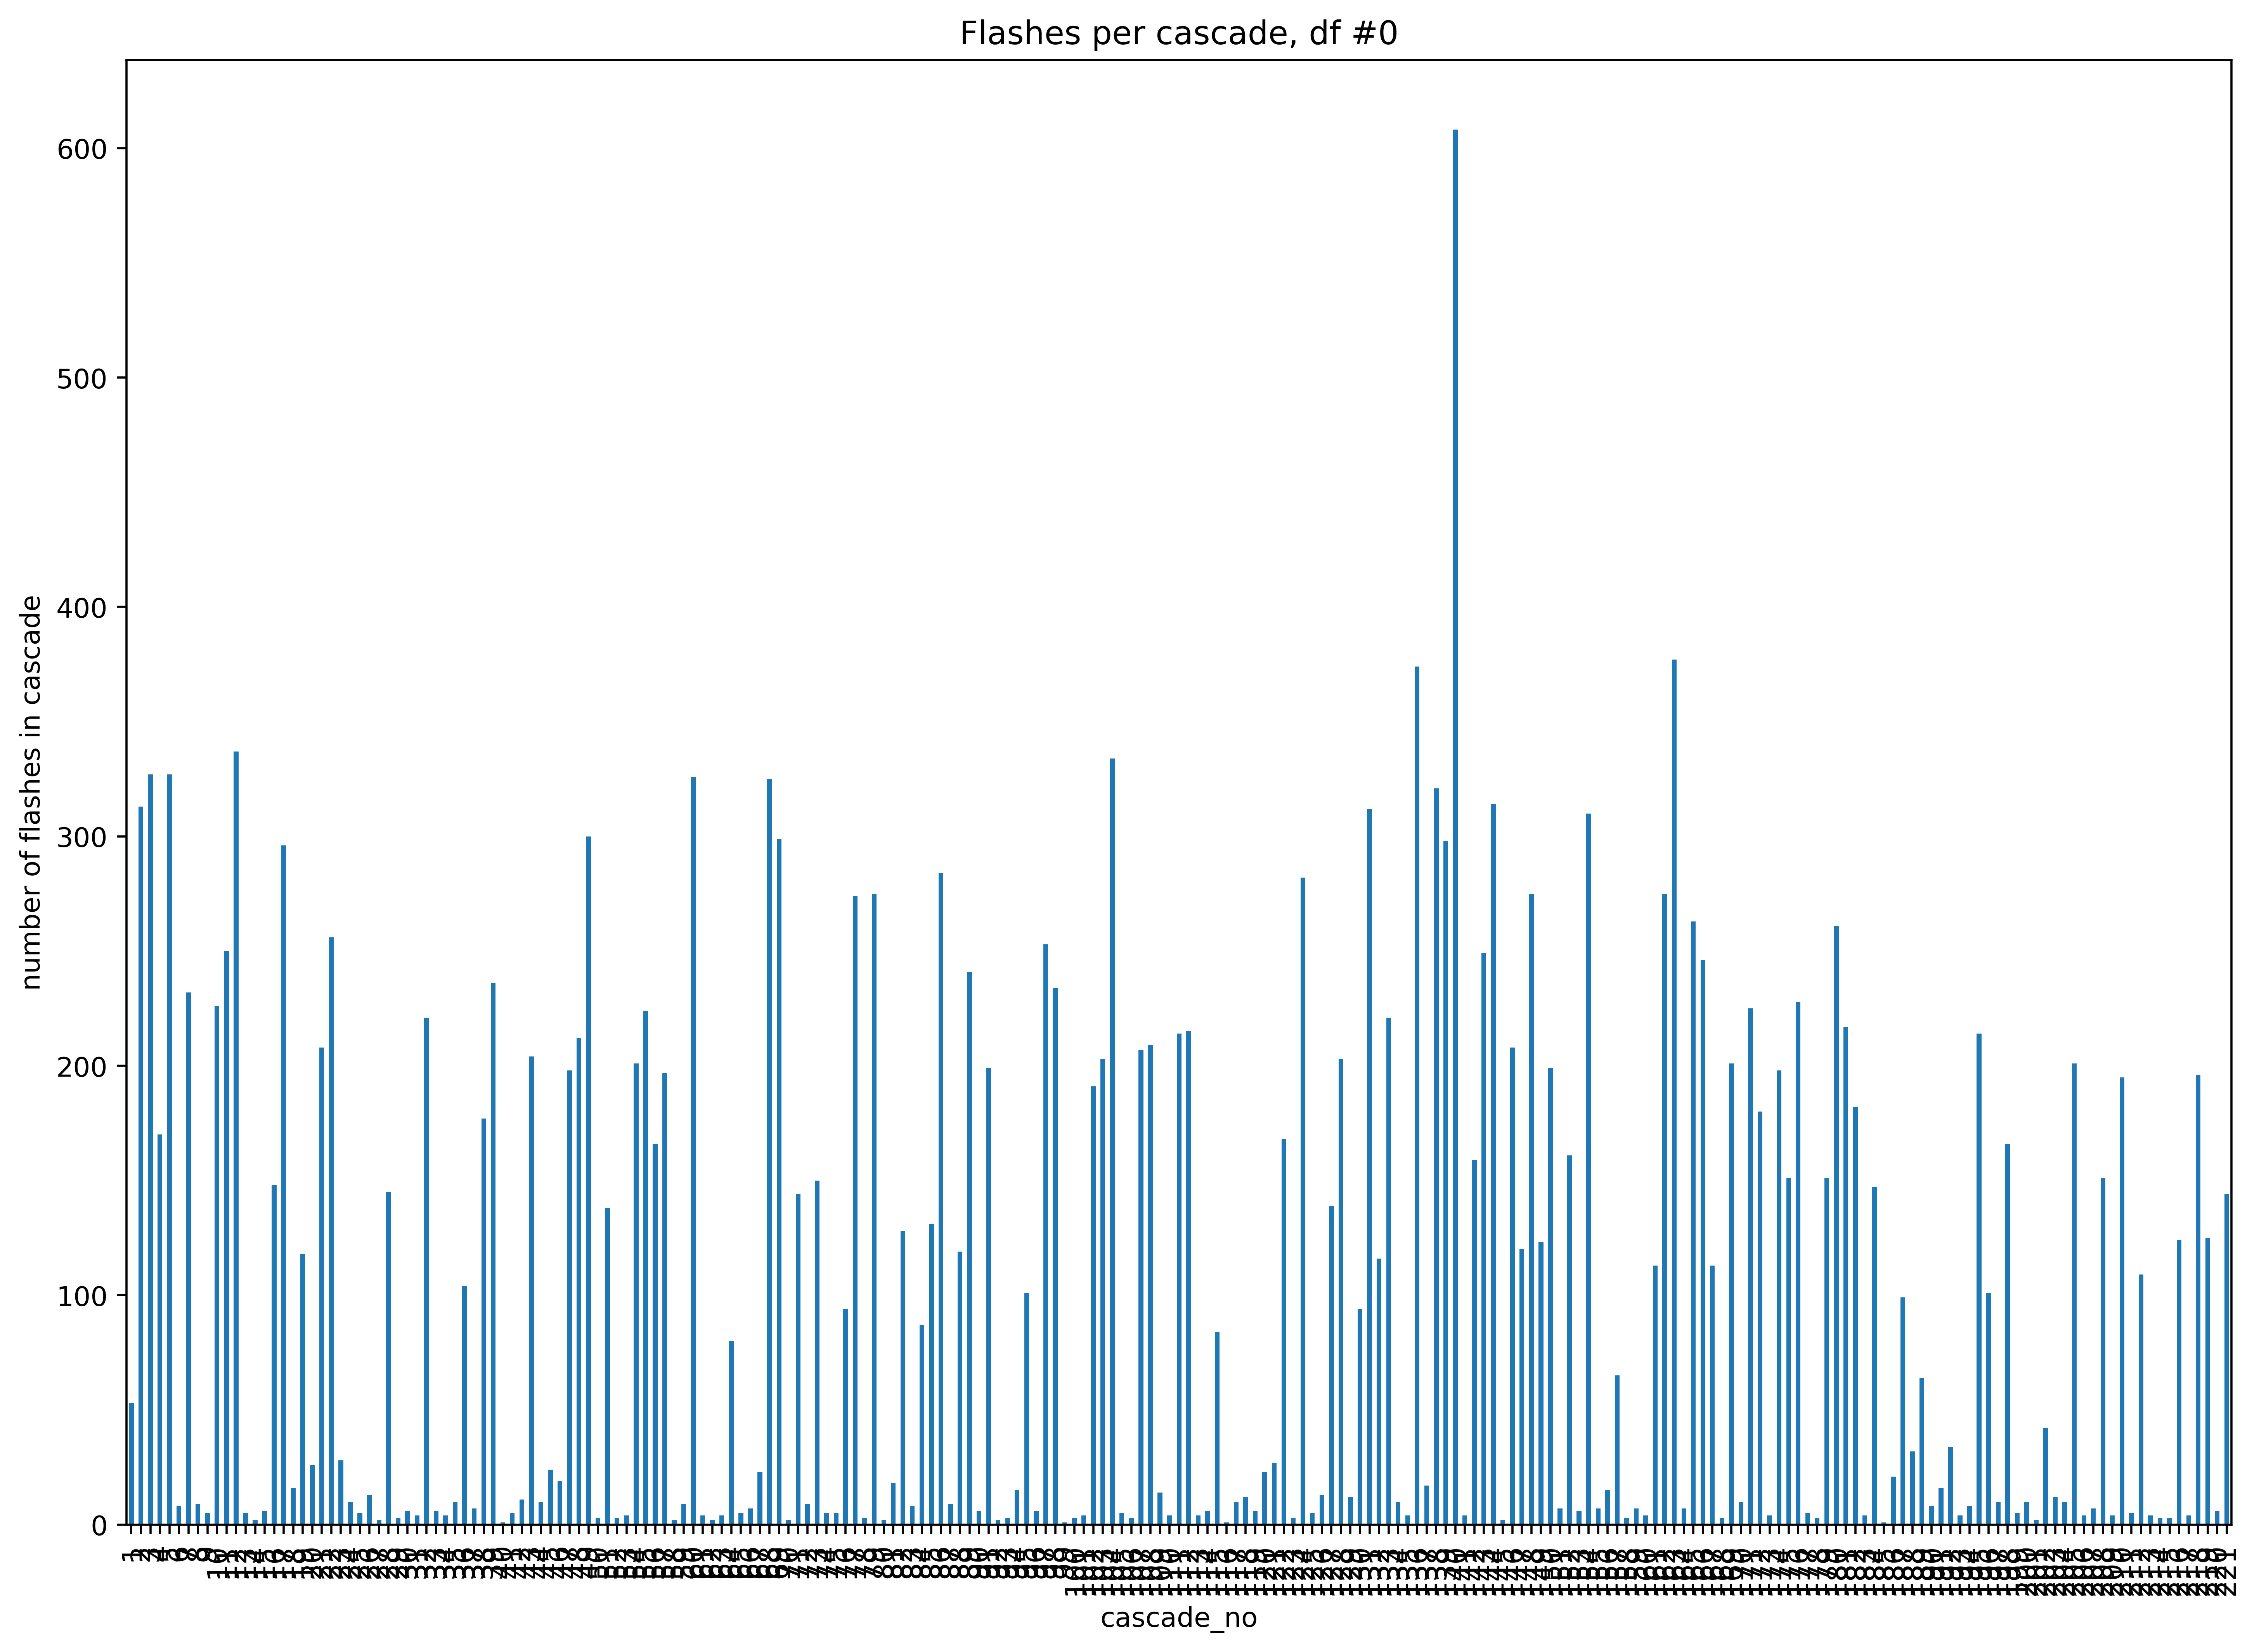

In [11]:
fig, ax = plt.subplots(figsize=(14, 10))
fig.patch.set_facecolor("white")
ax.set_title("Flashes per cascade, df #0")
ax.set_xlabel("cascade number")
ax.set_ylabel("number of flashes in cascade")
dw.dfs[0].groupby("cascade_no").size().plot.bar(ax=ax)

<AxesSubplot:title={'center':'Flashes per cascade, df #1'}, xlabel='cascade_no', ylabel='number of flashes in cascade'>

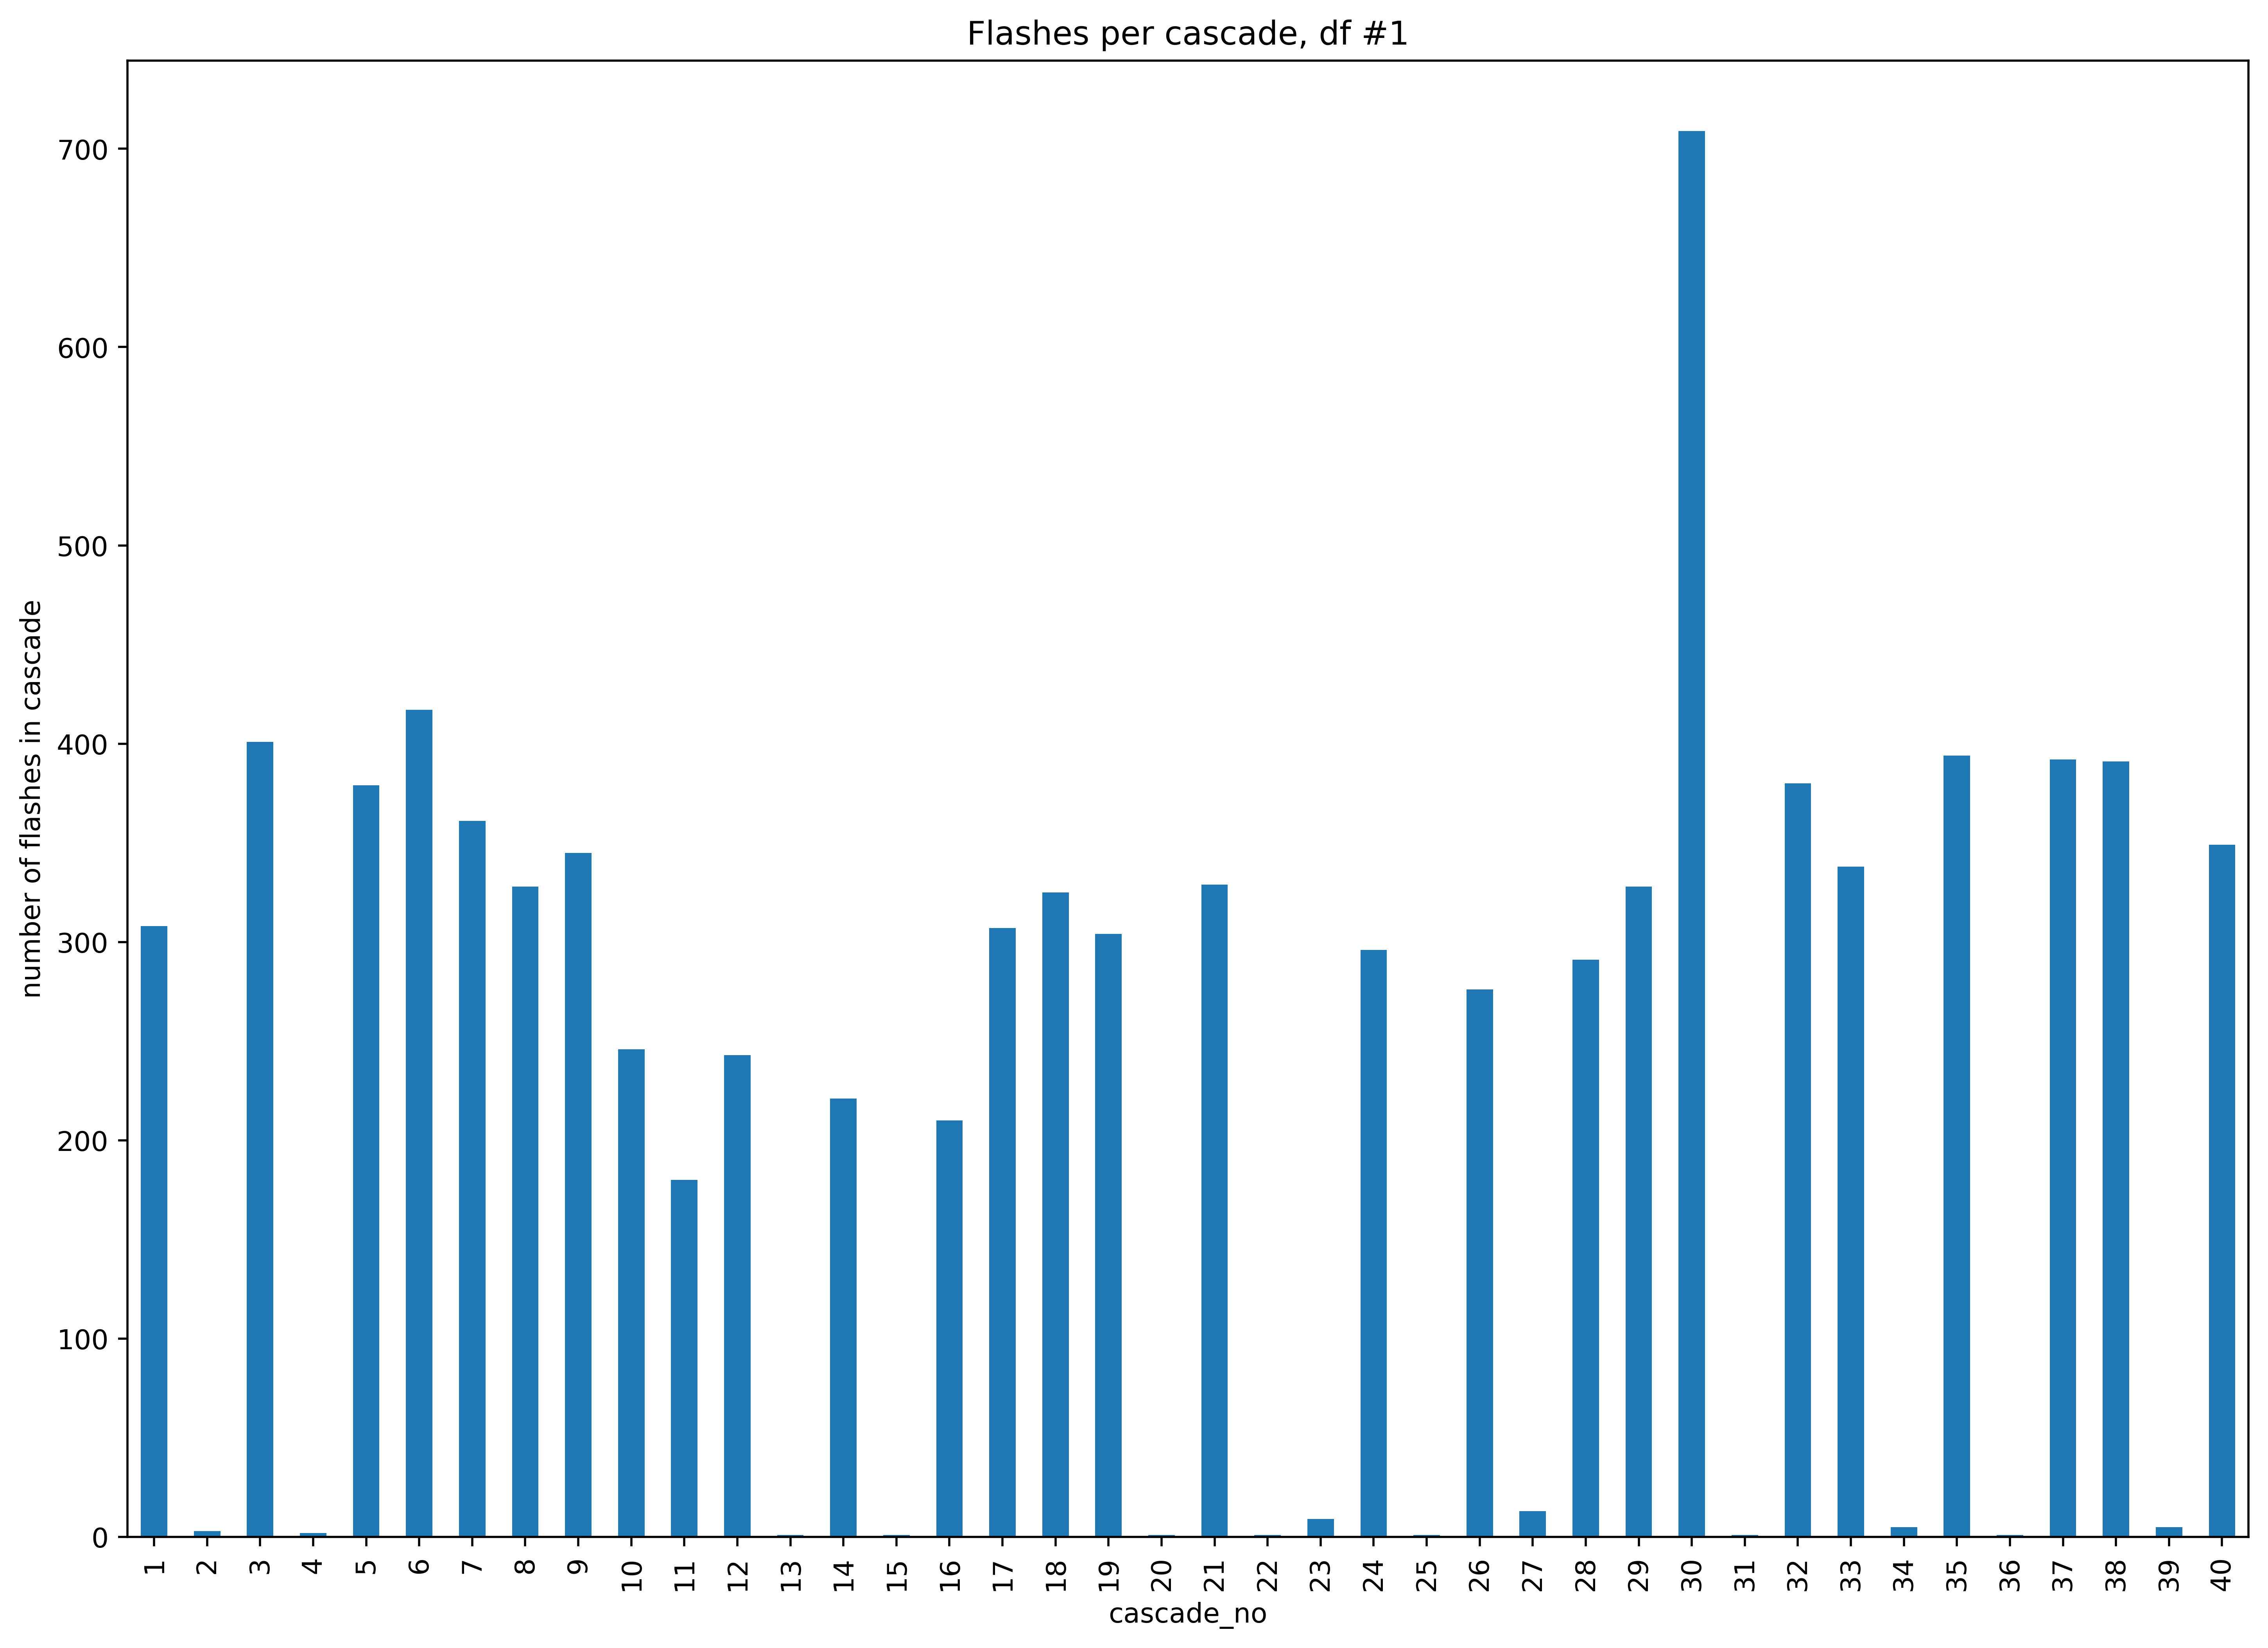

In [12]:
fig, ax = plt.subplots(figsize=(14, 10))
fig.patch.set_facecolor("white")
ax.set_title("Flashes per cascade, df #1")
ax.set_xlabel("cascade number")
ax.set_ylabel("number of flashes in cascade")
dw.dfs[1].groupby("cascade_no").size().plot.bar(ax=ax)

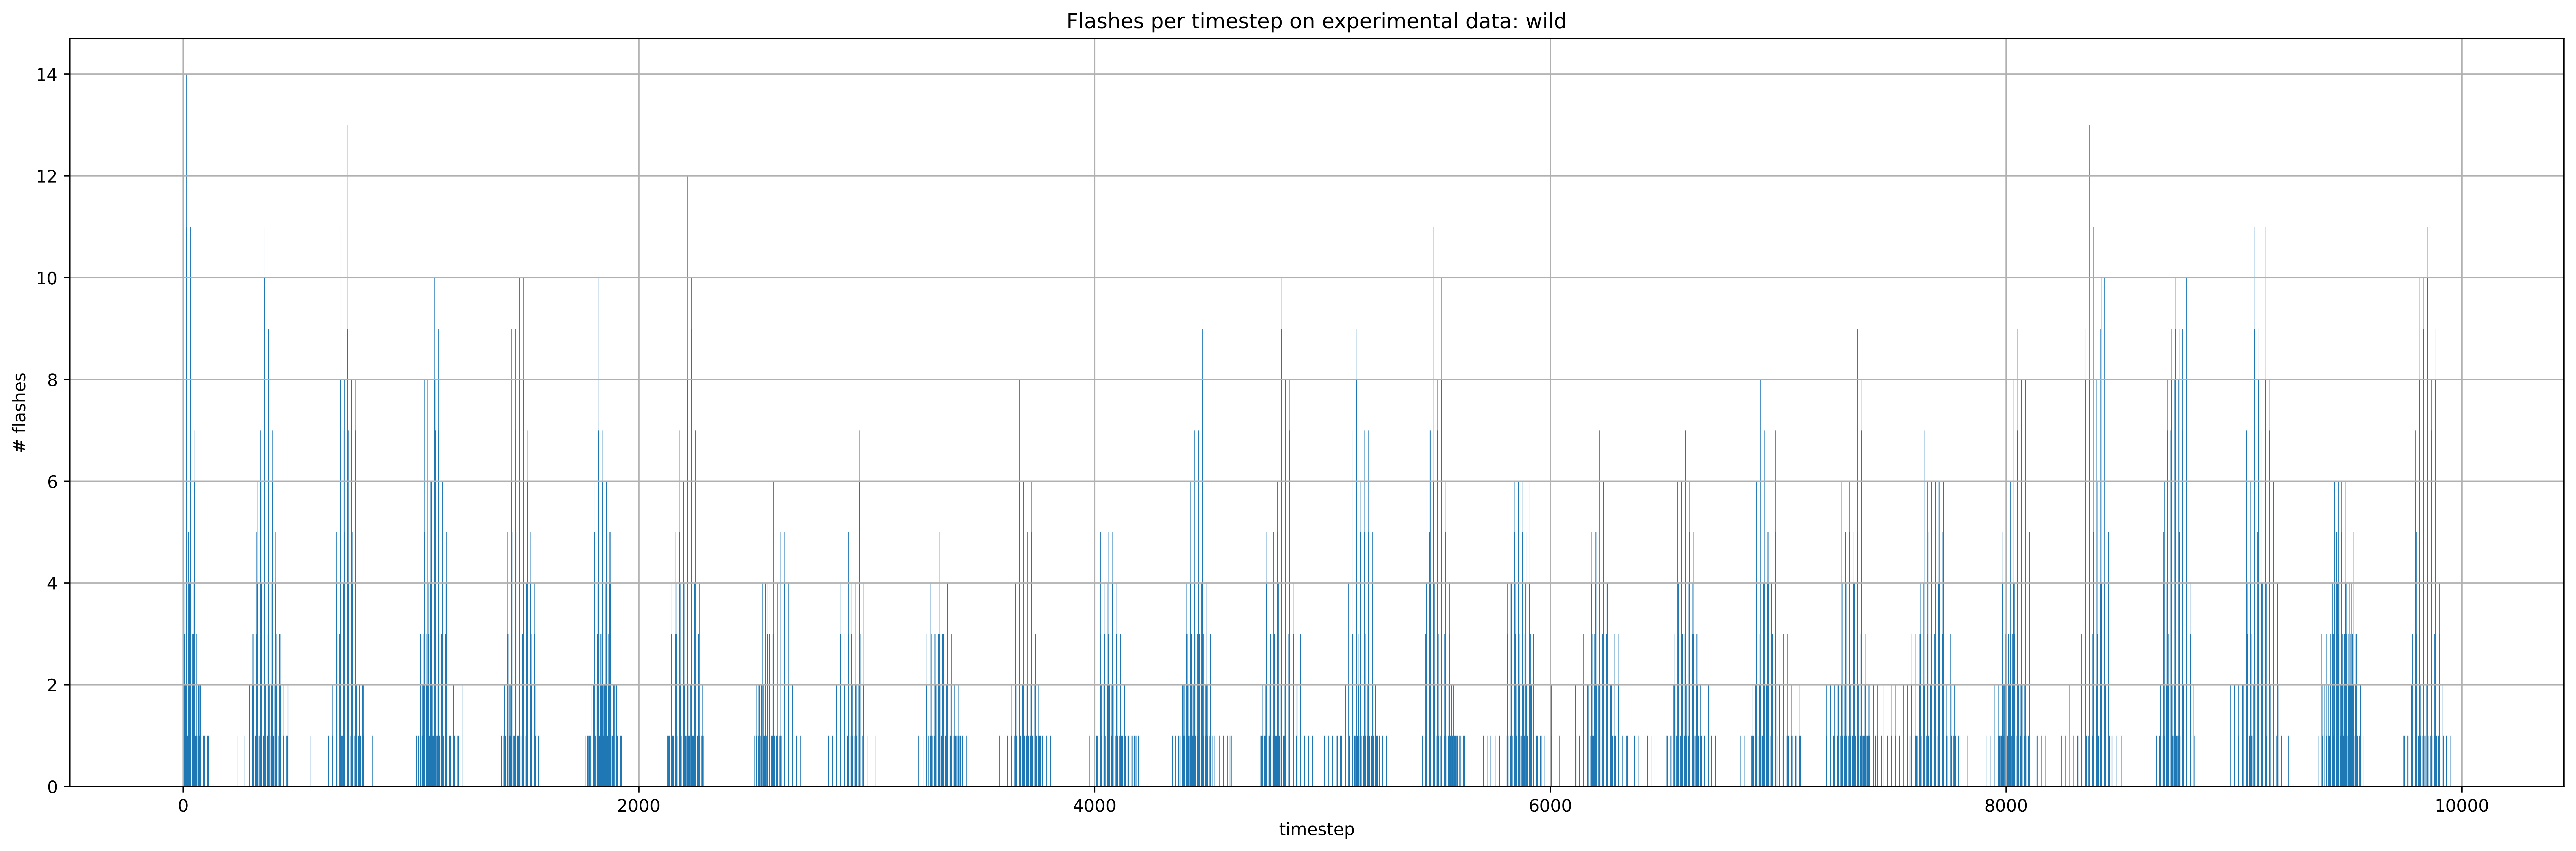

In [15]:
fig, ax = plt.subplots(figsize=(26, 8))
fig.patch.set_facecolor("white")
ax.set_xlabel("timestep")
ax.set_ylabel("# flashes")
ax.set_title("Flashes per timestep on experimental data: wild")
dw.dfs[1]["t"].hist(ax=ax, bins=max(dw.dfs[1]["t"]))

fig.savefig("figures/500dpi_flash_per_t_wild.png", dpi=500)

In [16]:
bounds_0 = get_cascade_bounds(dw.dfs[1]["t"], num_empty_threshold=30)

for bound in bounds_0:
    ax.axvline(bound, color="red", linewidth=0.15)

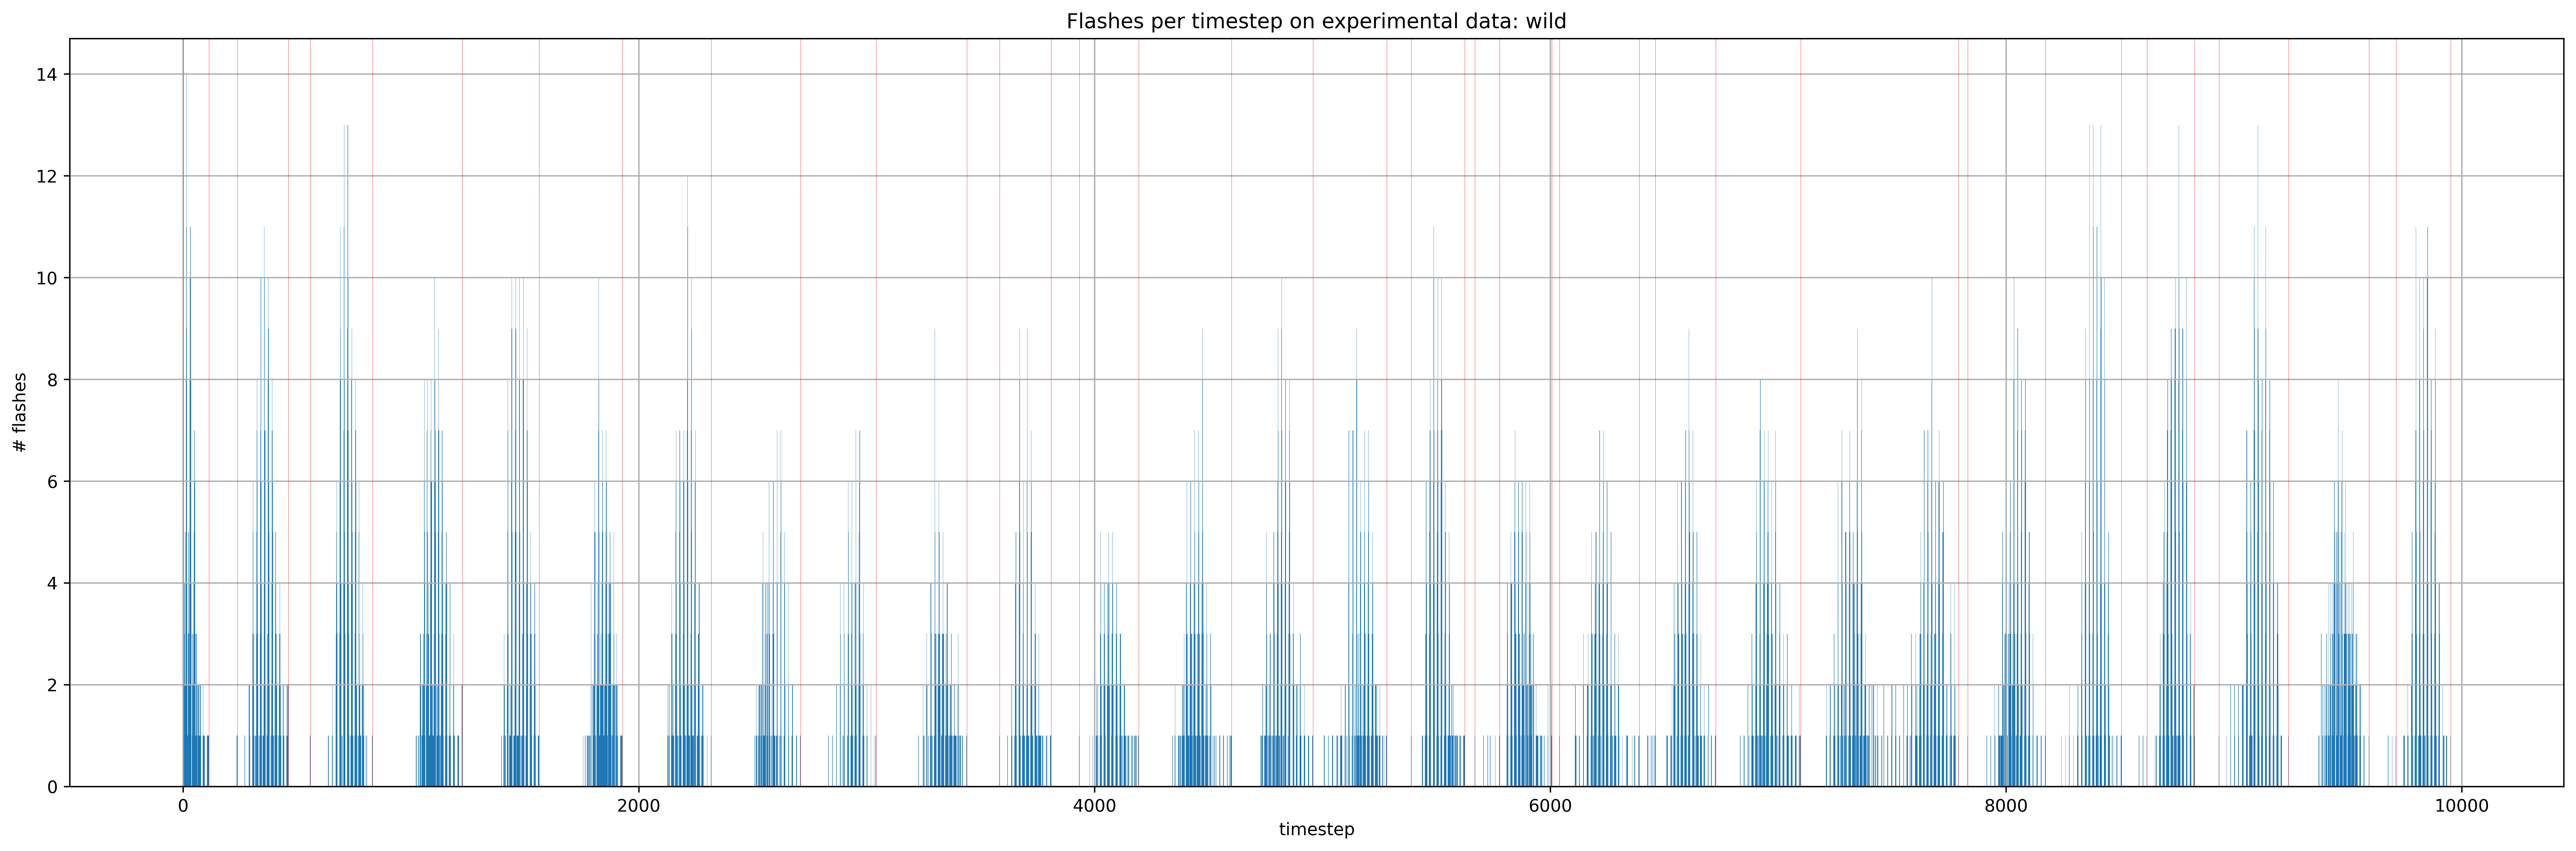

In [17]:
fig.savefig("figures/500dpi_flast_per_t_wild_wcascades_30thresh.png")
fig

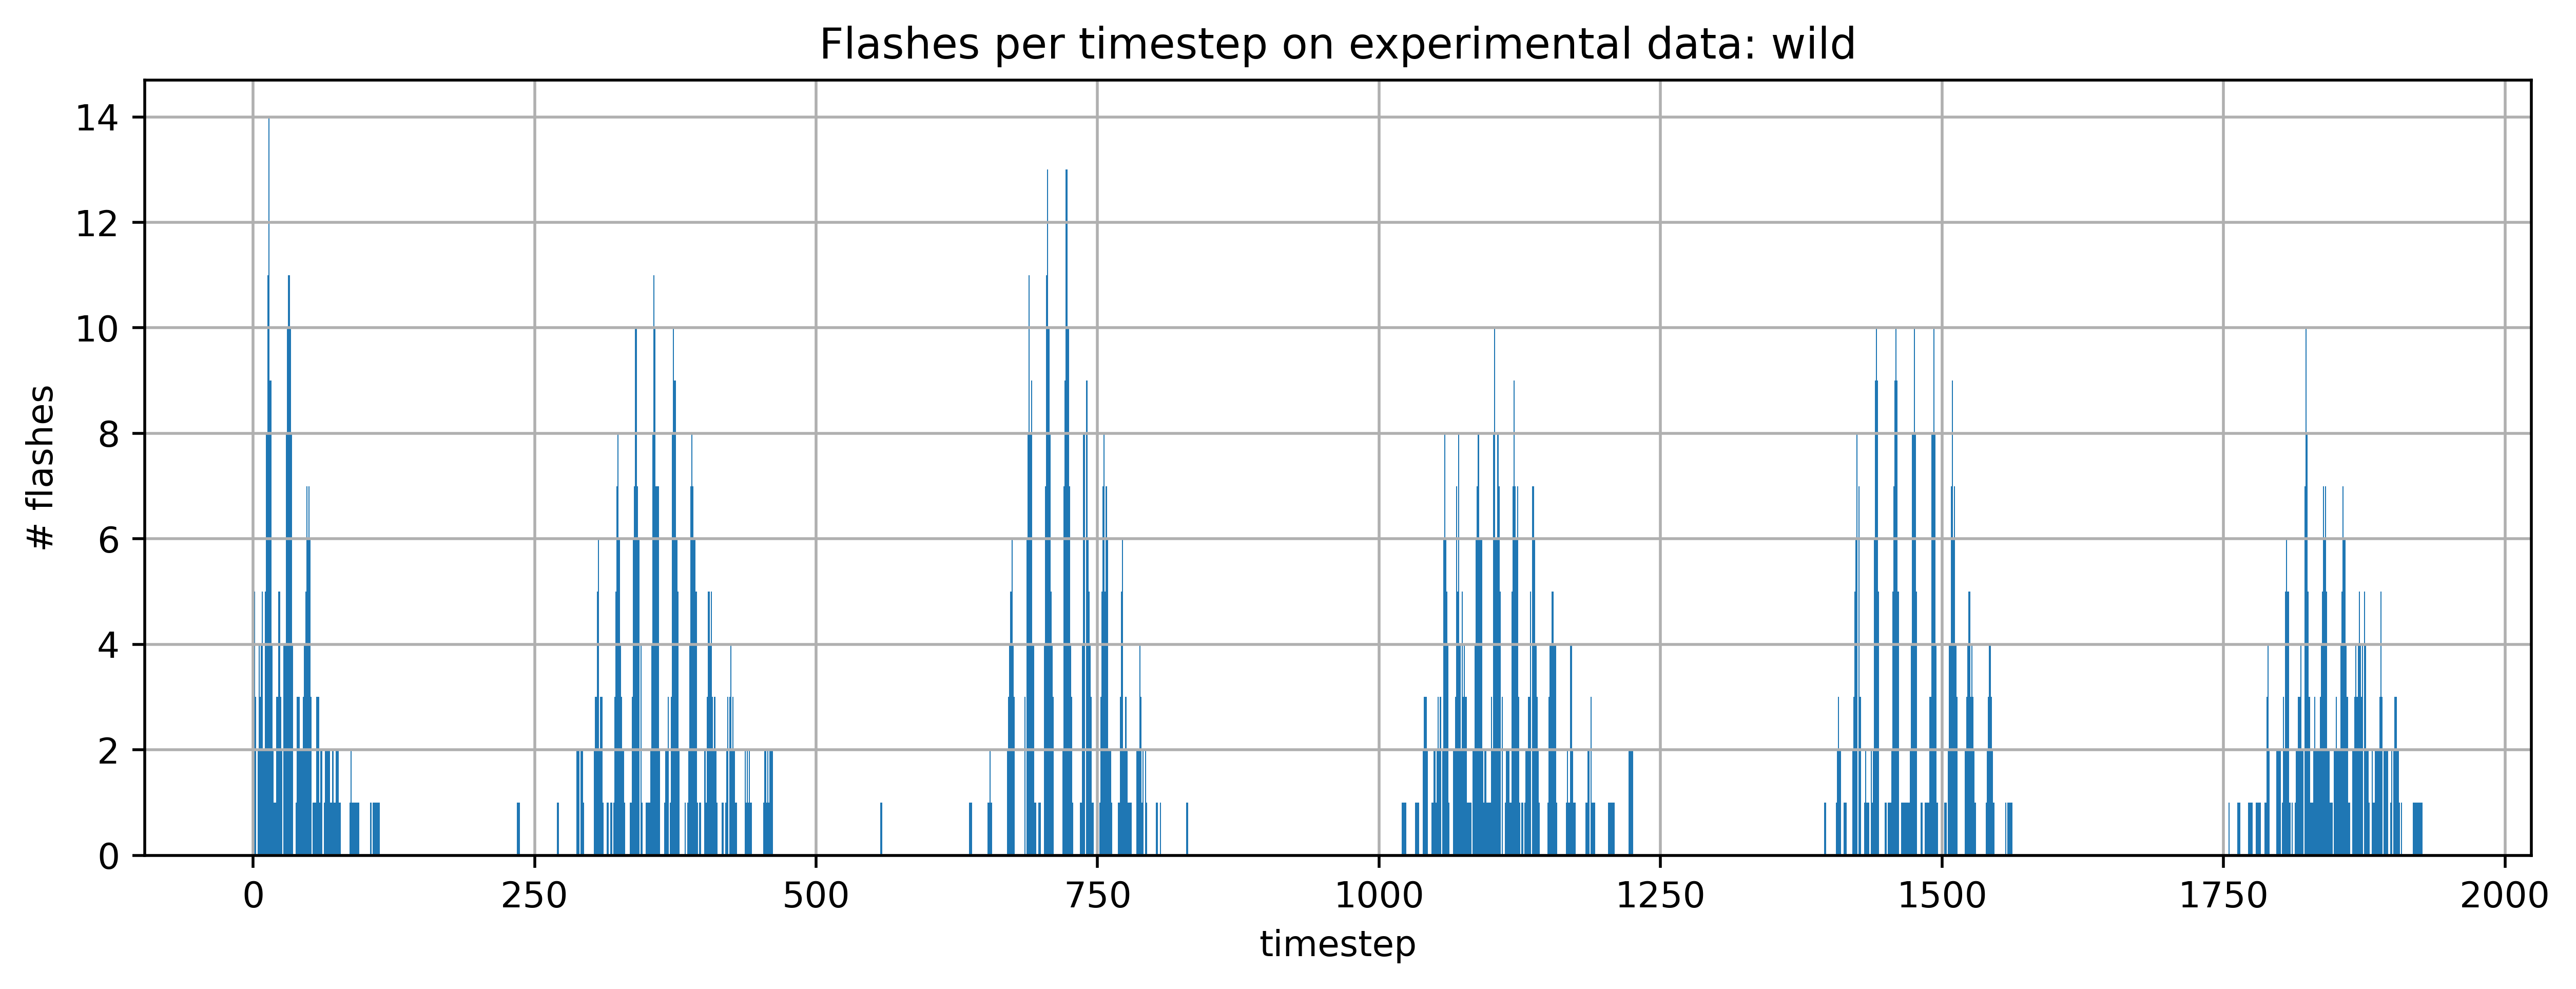

In [25]:
fig, ax = plt.subplots(figsize=(12, 4))
fig.patch.set_facecolor("white")
ax.set_title("Flashes per timestep on experimental data: wild")
ax.set_xlabel("timestep")
ax.set_ylabel("# flashes")

dw.dfs[1].loc[dw.dfs[1]["t"] < 2000]["t"].hist(ax=ax, bins=2000)
fig.savefig("figures/50dpi_flash_per_t_wild_sub2000.png", dpi=500)

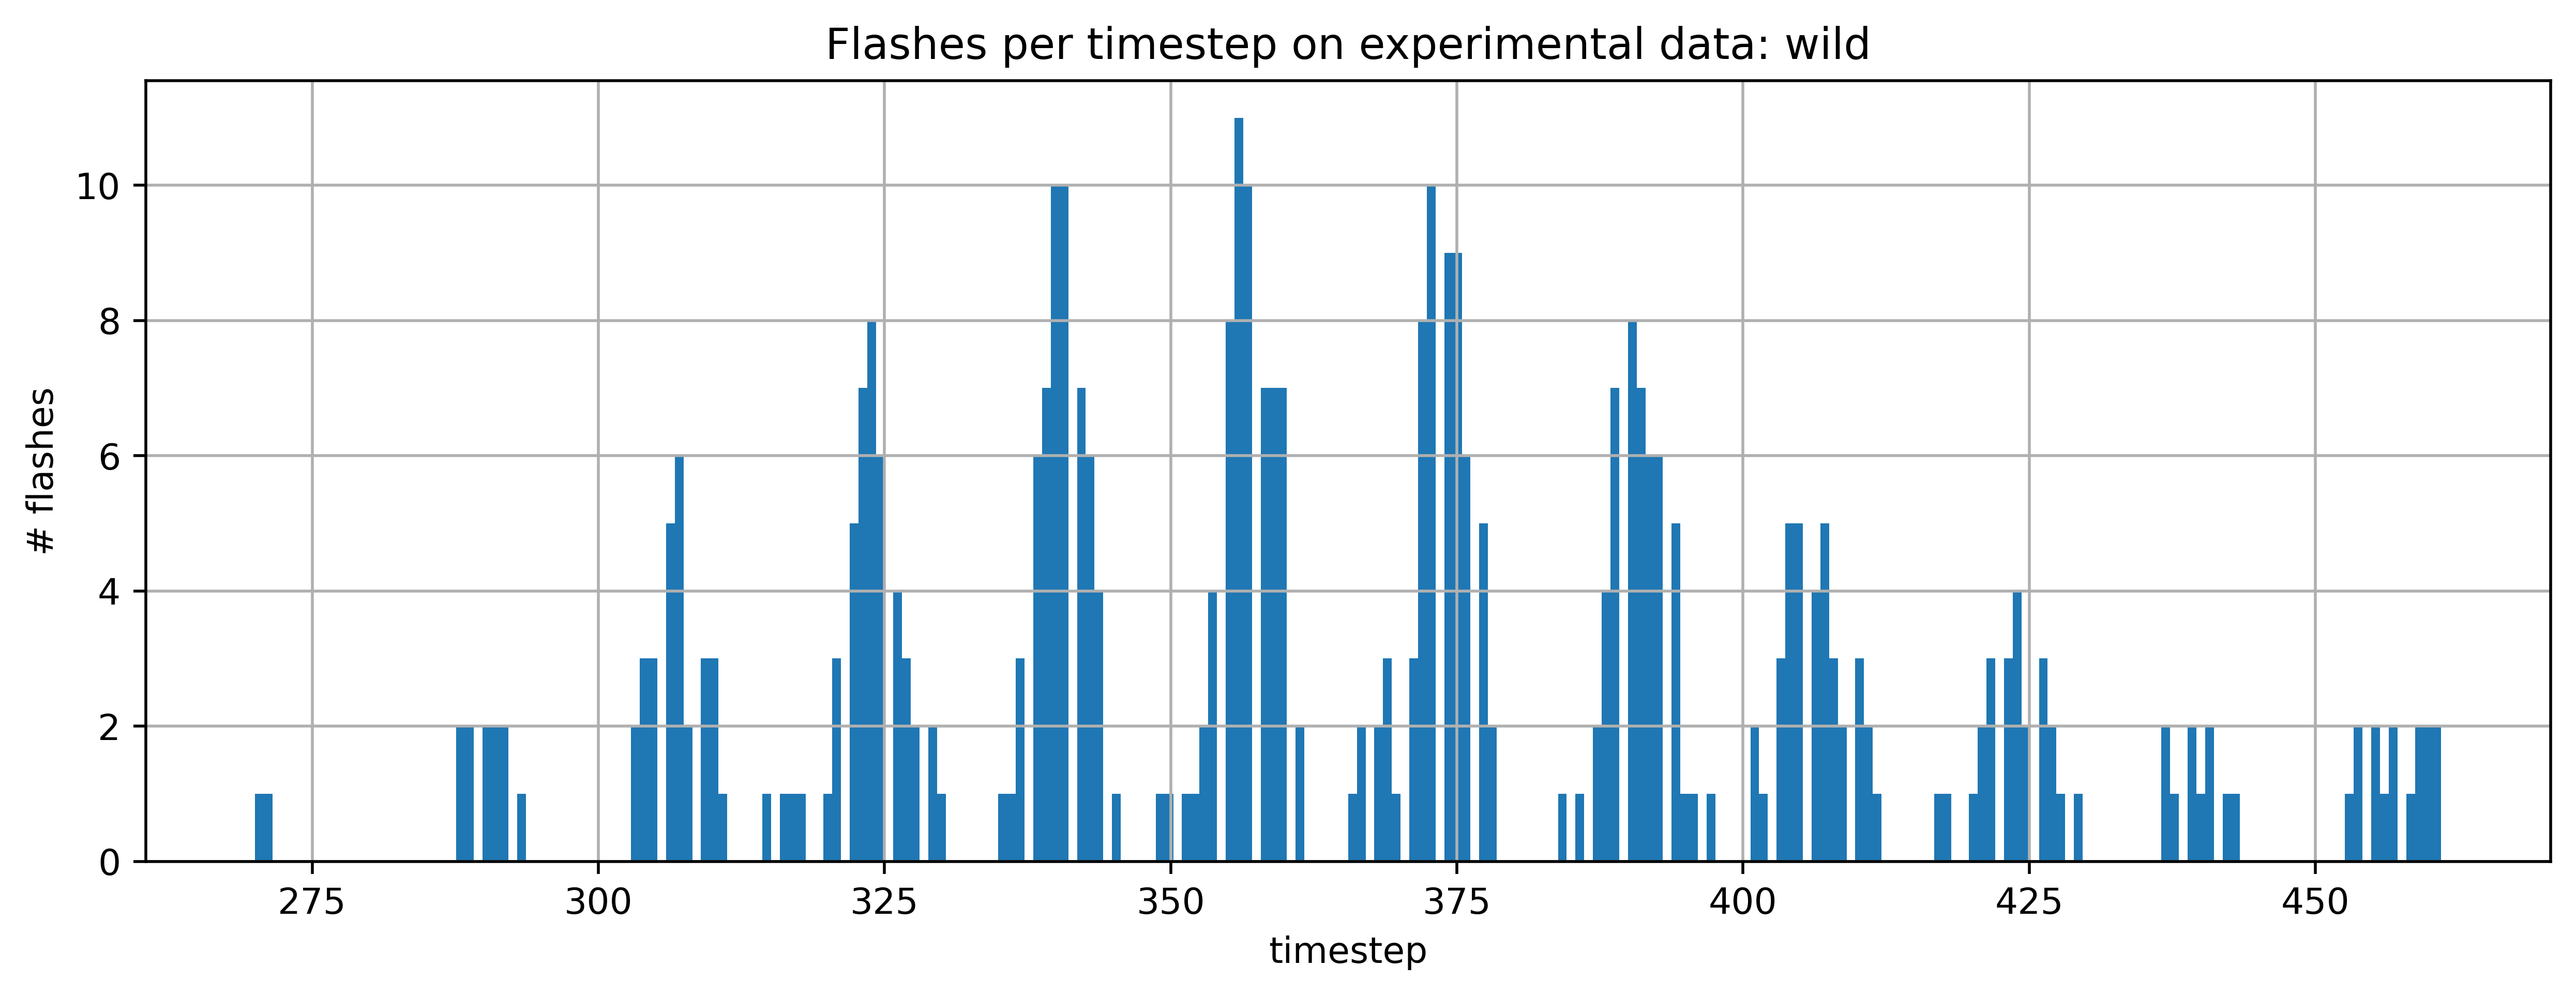

In [26]:
fig, ax = plt.subplots(figsize=(12, 4))
fig.patch.set_facecolor("white")
ax.set_title("Flashes per timestep on experimental data: wild")
ax.set_xlabel("timestep")
ax.set_ylabel("# flashes")

dw.dfs[1].loc[(dw.dfs[1]["t"] < 500) &
              (dw.dfs[1]["t"] > 240)]["t"].hist(ax=ax, bins=250)
fig.savefig("figures/50dpi_flash_per_t_wild_240to500.png", dpi=500)

In [ ]:
sim_file = "labeled_data/0.08density0.1betadistributionTb_obstacles4000_steps_experiment_results_2020-11-20_09:43:50.078343_trial_0_csv_labeled.csv"
dw_sim = normalized_count.DataWrangler(sim_file, is_labeled=True)

In [ ]:
sim_df = dw_sim.dfs[0]

fig, ax = plt.subplots(figsize=(26, 8))
fig.patch.set_facecolor("white")
ax.set_xlabel("timestep")
ax.set_ylabel("# flashes")
ax.set_title("Historgram of Flashes on sim df 0.08 #1")
sim_df["t"].hist(ax=ax, bins=max(sim_df["t"]))

In [ ]:
bounds_0 = get_cascade_bounds(sim_df["t"], num_empty_threshold=6)

for bound in bounds_0:
    ax.axvline(bound, color="red", linewidth=0.08)
    
fig